Creating a binary decision tree is actually a process of dividing up the input space. A greedy approach is used to divide the space called recursive binary splitting. This is a numerical procedure where all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner (e.g. the very best split point is chosen each time).

In [92]:
import numpy as np

X = np.array(
    [[2.771244718, 1.784783929],
    [1.728571309, 1.169761413],
    [3.678319846, 2.81281357],
    [3.961043357, 2.61995032],
    [2.999208922, 2.209014212],
    [7.497545867, 3.162953546],
    [9.00220326, 3.339047188],
    [7.444542326, 0.476683375],
    [10.12493903, 3.234550982],
    [6.642287351, 3.319983761]]
)

y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

data = np.concatenate((X, np.array([y]).T), axis=1)

In [76]:
data

array([[ 2.77124472,  1.78478393,  0.        ],
       [ 1.72857131,  1.16976141,  0.        ],
       [ 3.67831985,  2.81281357,  0.        ],
       [ 3.96104336,  2.61995032,  0.        ],
       [ 2.99920892,  2.20901421,  0.        ],
       [ 7.49754587,  3.16295355,  1.        ],
       [ 9.00220326,  3.33904719,  1.        ],
       [ 7.44454233,  0.47668338,  1.        ],
       [10.12493903,  3.23455098,  1.        ],
       [ 6.64228735,  3.31998376,  1.        ]])

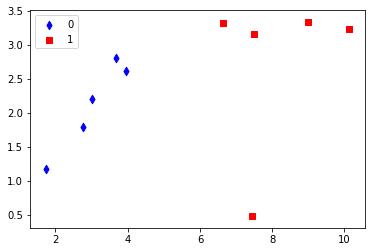

In [50]:
import matplotlib.pyplot as plt

class1 = np.where(y == 0)[0]
class2 = np.where(y == 1)[0]

plt.scatter(X[class1, 0], X[class1, 1], c='b', label='0', marker='d')
plt.scatter(X[class2, 0], X[class2, 1], c='r', label='1', marker='s')
plt.legend(loc='best')

In [107]:
# Tree
# 0, 1 - листовой узел
# split_point = (attribute_num, attribute_value)
# (split_point, left_subtree, right_subtree)


class CartDecisionTree:
            
        
    def partition_by(self, split_point, data):
        """Get subsets from data splitted by split_point"""
        attribute_num, attribute_val = split_point
        left_subset = np.array([d for d in data if d[attribute_num] < attribute_val])
        right_subset = np.array([d for d in data if d[attribute_num] >= attribute_val])
        
        return left_subset, right_subset
    
    
    def find_class_shares(self, split_point, data):
        """Find shares of classes in left and right subsets built upon split_point"""
        left_subset, right_subset = self.partition_by(split_point, data)
        
        left_class_shares = (
            len([d for d in left_subset if not d[-1]]) / len(left_subset),
            len([d for d in left_subset if d[-1]]) / len(left_subset)
        ) if len(left_subset) > 0 else (np.nan, np.nan)
        
        right_class_shares = (
            len([d for d in right_subset if not d[-1]]) / len(right_subset),
            len([d for d in right_subset if d[-1]]) / len(right_subset)
        ) if len(right_subset) > 0 else (np.nan, np.nan)
        
        return left_class_shares, right_class_shares
    
    
    def gini_cost(self, split_point, data):
        """Cost function for classification trees"""
        left_class_shares, right_class_shares = self.find_class_shares(split_point, data)
        return sum(l * (1 - l) + r * (1 - r) for l, r in zip(left_class_shares, right_class_shares))
    
    
    def find_best_split_point(self, data):
        """Find best split point in data"""
        best_gini = np.inf
        best_split_point = None
        
        for x in data[:, :-1]:
            for attribute_num, attribute_value in enumerate(x):
                split_point = attribute_num, attribute_value
                gini = self.gini_cost(split_point, data)
                
                # Edge case
                if np.isnan(gini): continue
                
                if gini < best_gini:
                    best_split_point = split_point
                    best_gini = gini
        
        assert best_split_point is not None, 'Internal error: best split point is not found'
        
        return best_split_point
    
    
    def build_tree(self, data):
        data_count = len(data)
        one_class_count = len([d for d in data if d[-1]])
        zero_class_count = data_count - one_class_count
        
        if one_class_count == 0: return 0
        if zero_class_count == 0: return 1
        
        split_point = self.find_best_split_point(data)
        left_subset, right_subset = self.partition_by(split_point, data)
        left_subtree, right_subtree = self.build_tree(left_subset), self.build_tree(right_subset)
        
        return (split_point, left_subtree, right_subtree)
                
    
    def fit(self, data):
        self.tree = self.build_tree(data)
    
    
    def predict(self, x, tree=None):
        if tree is None:
            tree = self.tree
        
        if tree in [0, 1]:
            return tree
        
        split_point, left_subtree, right_subtree = tree
        attribute_num, attribute_value = split_point

        next_subtree = left_subtree if x[attribute_num] < attribute_value else right_subtree
        
        return self.predict(x, tree=next_subtree)

In [108]:
clf = CartDecisionTree()
clf.fit(data)

(0, 6.642287351) 0.0


In [109]:
clf.tree

((0, 6.642287351), 0, 1)

In [111]:
y_pred = []

for x in X:
    y_pred.append(clf.predict(x))
    
np.allclose(y_pred, y)

True